In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Create Training

In [2]:
# Feature set containing 25 * 2 for 25 (x,y) values of known/training data that are random integers 0-99
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)
# Label each one either Red or Blue with numbers 0 and 1. Response is a random integers 0-1 of 25 * 1 values
responses = np.random.randint(0,3,(25,1)).astype(np.float32) #responses 25 x 1 matrix 

In [3]:
print ("Training Data:\n", trainData)
print("\n Responses:\n", responses)
print("Responses Ravel or flattened as 1-D:\n", responses.ravel()) #Method .ravel flattens the np array to 1-D. 
print("Red Responses: \n ", responses.ravel()== 0) #color 0 is "Red", color 1 is blue

Training Data:
 [[75. 76.]
 [46. 44.]
 [30. 50.]
 [11. 29.]
 [36. 14.]
 [52. 26.]
 [18. 93.]
 [87. 63.]
 [82. 87.]
 [27. 10.]
 [27. 86.]
 [69. 28.]
 [83. 48.]
 [96. 35.]
 [18. 88.]
 [62. 25.]
 [40. 69.]
 [78. 30.]
 [ 3. 41.]
 [ 0. 64.]
 [44.  7.]
 [87. 90.]
 [ 0. 60.]
 [97. 88.]
 [52.  4.]]

 Responses:
 [[0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [0.]
 [2.]
 [0.]
 [1.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [2.]]
Responses Ravel or flattened as 1-D:
 [0. 1. 1. 1. 2. 0. 2. 0. 1. 2. 2. 0. 1. 0. 1. 2. 1. 1. 2. 2. 1. 0. 1. 0.
 2.]
Red Responses: 
  [ True False False False False  True False  True False False False  True
 False  True False False False False False False False  True False  True
 False]


In [4]:
# Make red and blue
red = trainData[responses.ravel()==0] #red is now trained data with responses of 0
print(red)

[[75. 76.]
 [52. 26.]
 [87. 63.]
 [69. 28.]
 [96. 35.]
 [87. 90.]
 [97. 88.]]


In [5]:
blue = trainData[responses.ravel()==1] #blue is now the trained data with responses of 1 
print(blue)

[[46. 44.]
 [30. 50.]
 [11. 29.]
 [82. 87.]
 [83. 48.]
 [18. 88.]
 [40. 69.]
 [78. 30.]
 [44.  7.]
 [ 0. 60.]]


In [6]:
yellow = trainData[responses.ravel()==2] #blue is now the trained data with responses of 1 
print(yellow)

[[36. 14.]
 [18. 93.]
 [27. 10.]
 [27. 86.]
 [62. 25.]
 [ 3. 41.]
 [ 0. 64.]
 [52.  4.]]


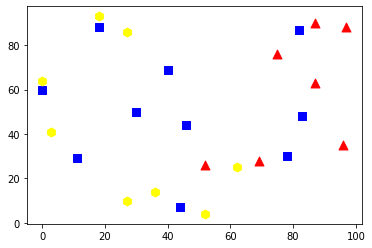

In [7]:
#matplotlib.pyplot.scatter(x, y, s=None, c=None, marker=None, ...)
plt.scatter(red[:,0],red[:,1],80,'r','^') #size 80, red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #size 80, blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'yellow','h') #size 80, yellow, hexagon
plt.show()

#Test Unknown Data

In [8]:
#create 1 * 2 or 1 (x,y) value with random integer 0-99
newcomer = np.random.randint(0,100,(1,2)).astype(np.float32)
print(newcomer)

[[ 9. 95.]]


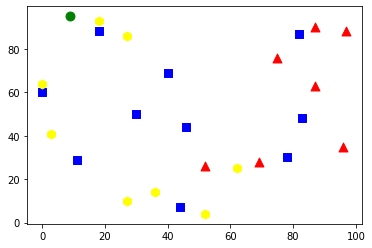

In [9]:
plt.scatter(red[:,0],red[:,1],80,'r','^') #red, triangle
plt.scatter(blue[:,0],blue[:,1],80,'b','s') #blue, square
plt.scatter(yellow[:,0],yellow[:,1],80,'yellow','h') #yellow, hexagon
plt.scatter(newcomer[:,0],newcomer[:,1],80,'g','o') #green, circle
plt.show()

In [12]:
colorName = np.array(['Red', 'Blue', 'Yellow'])

knn = cv.ml.KNearest_create()
knn.train(trainData, cv.ml.ROW_SAMPLE, responses)
k = 4
ret, results, neighbors, dist = knn.findNearest(newcomer, k)

'''
resultColor = []
for result in results:  
    if result[0] == 0: 
        resultColor.append("Red")
    else:
        resultColor.append("Blue")

neighborColors = []
for neighbor in neighbors[0]:  
    if neighbor == 0: 
        neighborColors.append("Red")
    else:
        neighborColors.append("Blue")
'''
resultColor = colorName[results[0].astype(int)]
neighborColors = colorName[neighbors[0].astype(int)]

print( "result color:  {}\n".format(resultColor) )
print( "neighbors:  {}\n".format(neighbors) )
print( "neighbor colors:  {}\n".format(neighborColors) )
print( "neighbor distances:  {}\n".format(dist[0]) )

result color:  ['Yellow']

neighbors:  [[2. 1. 2. 2.]]

neighbor colors:  ['Yellow' 'Blue' 'Yellow' 'Yellow']

neighbor distances:  [  85.  130.  405. 1042.]

